<center><h1>TRABAJO FIN DE MASTER</header1></center>
<left><h1>Prediagnóstico de problemas de salud mental. </header1></left>

# Importación de librerias 📦

In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#import squarify
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score



warnings.filterwarnings("ignore")

 # 1. Exploratory Data Analysis (EDA) 


## 1.1 Definición del Contexto
1. Define el objetivo del análisis.
2. Comprende el origen de los datos y su relación con el problema a resolver.

## 1.2 Carga y Exploración Inicial de Datos

In [1]:
import pandas as pd

# Cargar los datos
df=pd.read_csv('train_depression.csv') 

# Revisión general
print(df.head())


   id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours     

In [2]:
print(df.info())
print(f'Número de filas y columnas: {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [3]:
print("Checking if there are any null values:\n", df.isnull().sum())
print("\nChecking if there are any duplicate rows: ", df.duplicated().sum())

df.info()

# Extracting important column types
target_column = 'Depression'
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns.drop(target_column)

print("\n🔍 Column Types:")
print("Target Column:", target_column)
print("Categorical Columns:", categorical_columns.tolist())
print("Numerical Columns:", numerical_columns.tolist())

Checking if there are any null values:
 id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0


# Análisis Descriptivo

In [4]:
df.describe().round(2).style.format(precision=2).background_gradient(
    cmap="Blues"
)


In [5]:
#Encontramos  Muchas Clases en Dietary Habits , deberia salir 3 
df.describe(include="object").round(2).style.format(precision=2).background_gradient(
    cmap="Blues"
)


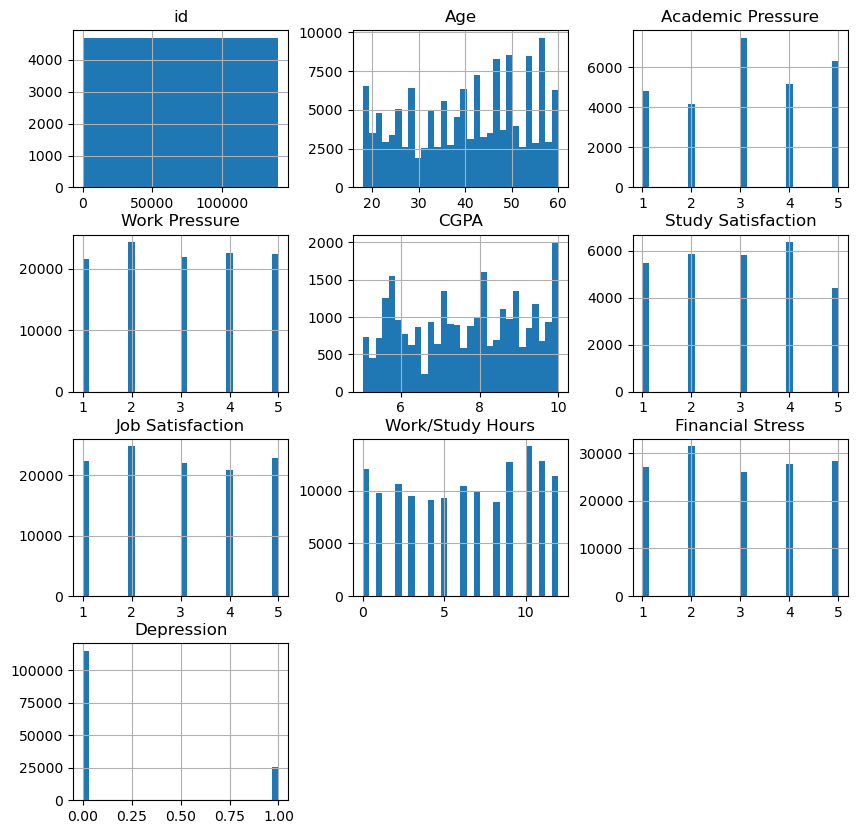

In [6]:
import matplotlib.pyplot as plt

# Distribuciones de las variables
df.hist(bins=30, figsize=(10, 10))
plt.show()

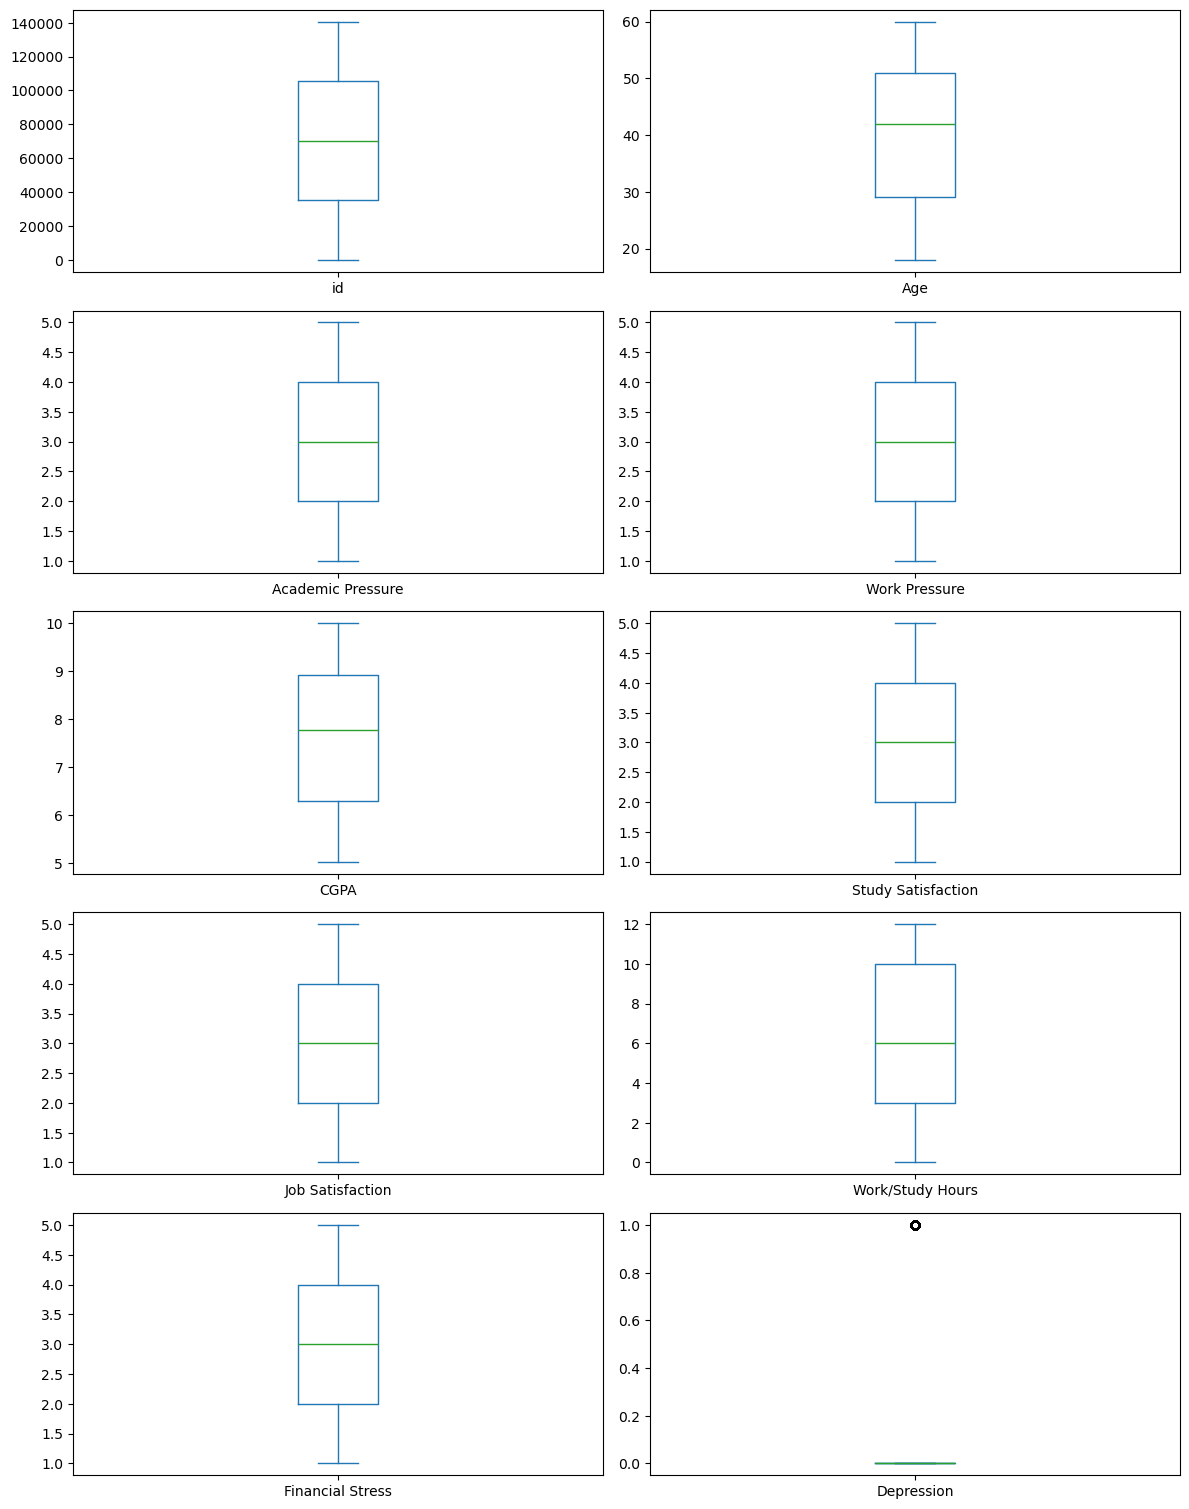

In [7]:
import math
from matplotlib import pyplot

# Número de columnas en el dataset
num_columns = len(df.columns)

# Calcular el número de filas y columnas necesarias para el layout
nrows = math.ceil(num_columns / 2)  # Por ejemplo, dividir en 2 columnas
ncols = 2  # Fijar 2 columnas

# Crear los boxplots
df.plot(kind='box', subplots=True, layout=(nrows, ncols), sharex=False, sharey=False, figsize=(12, nrows * 3))
pyplot.tight_layout()
pyplot.show()

## 1.6. Correlaciones

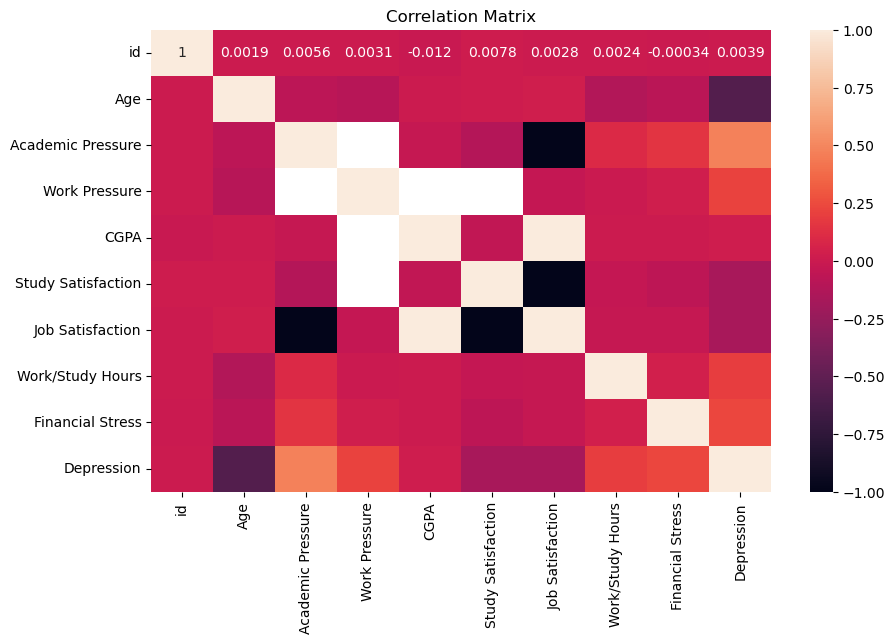

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas del DataFrame
df_numeric = df.select_dtypes(include=['float64', 'int64'])

#Correlacion entre nuestras variables features numericas.
correlation = df_numeric.corr()

# Set the figure size for the heatmap plot
plt.figure(figsize=(10, 6))

# Create a heatmap using seaborn (sns) to visualize the correlation matrix
# The 'annot' parameter displays the correlation values in each cell
sns.heatmap(correlation, annot=True)

# Set the title of the heatmap plot
plt.title("Correlation Matrix")

# Display the heatmap plot
plt.show()

C:\Users\pmogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pmogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pmogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pmogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

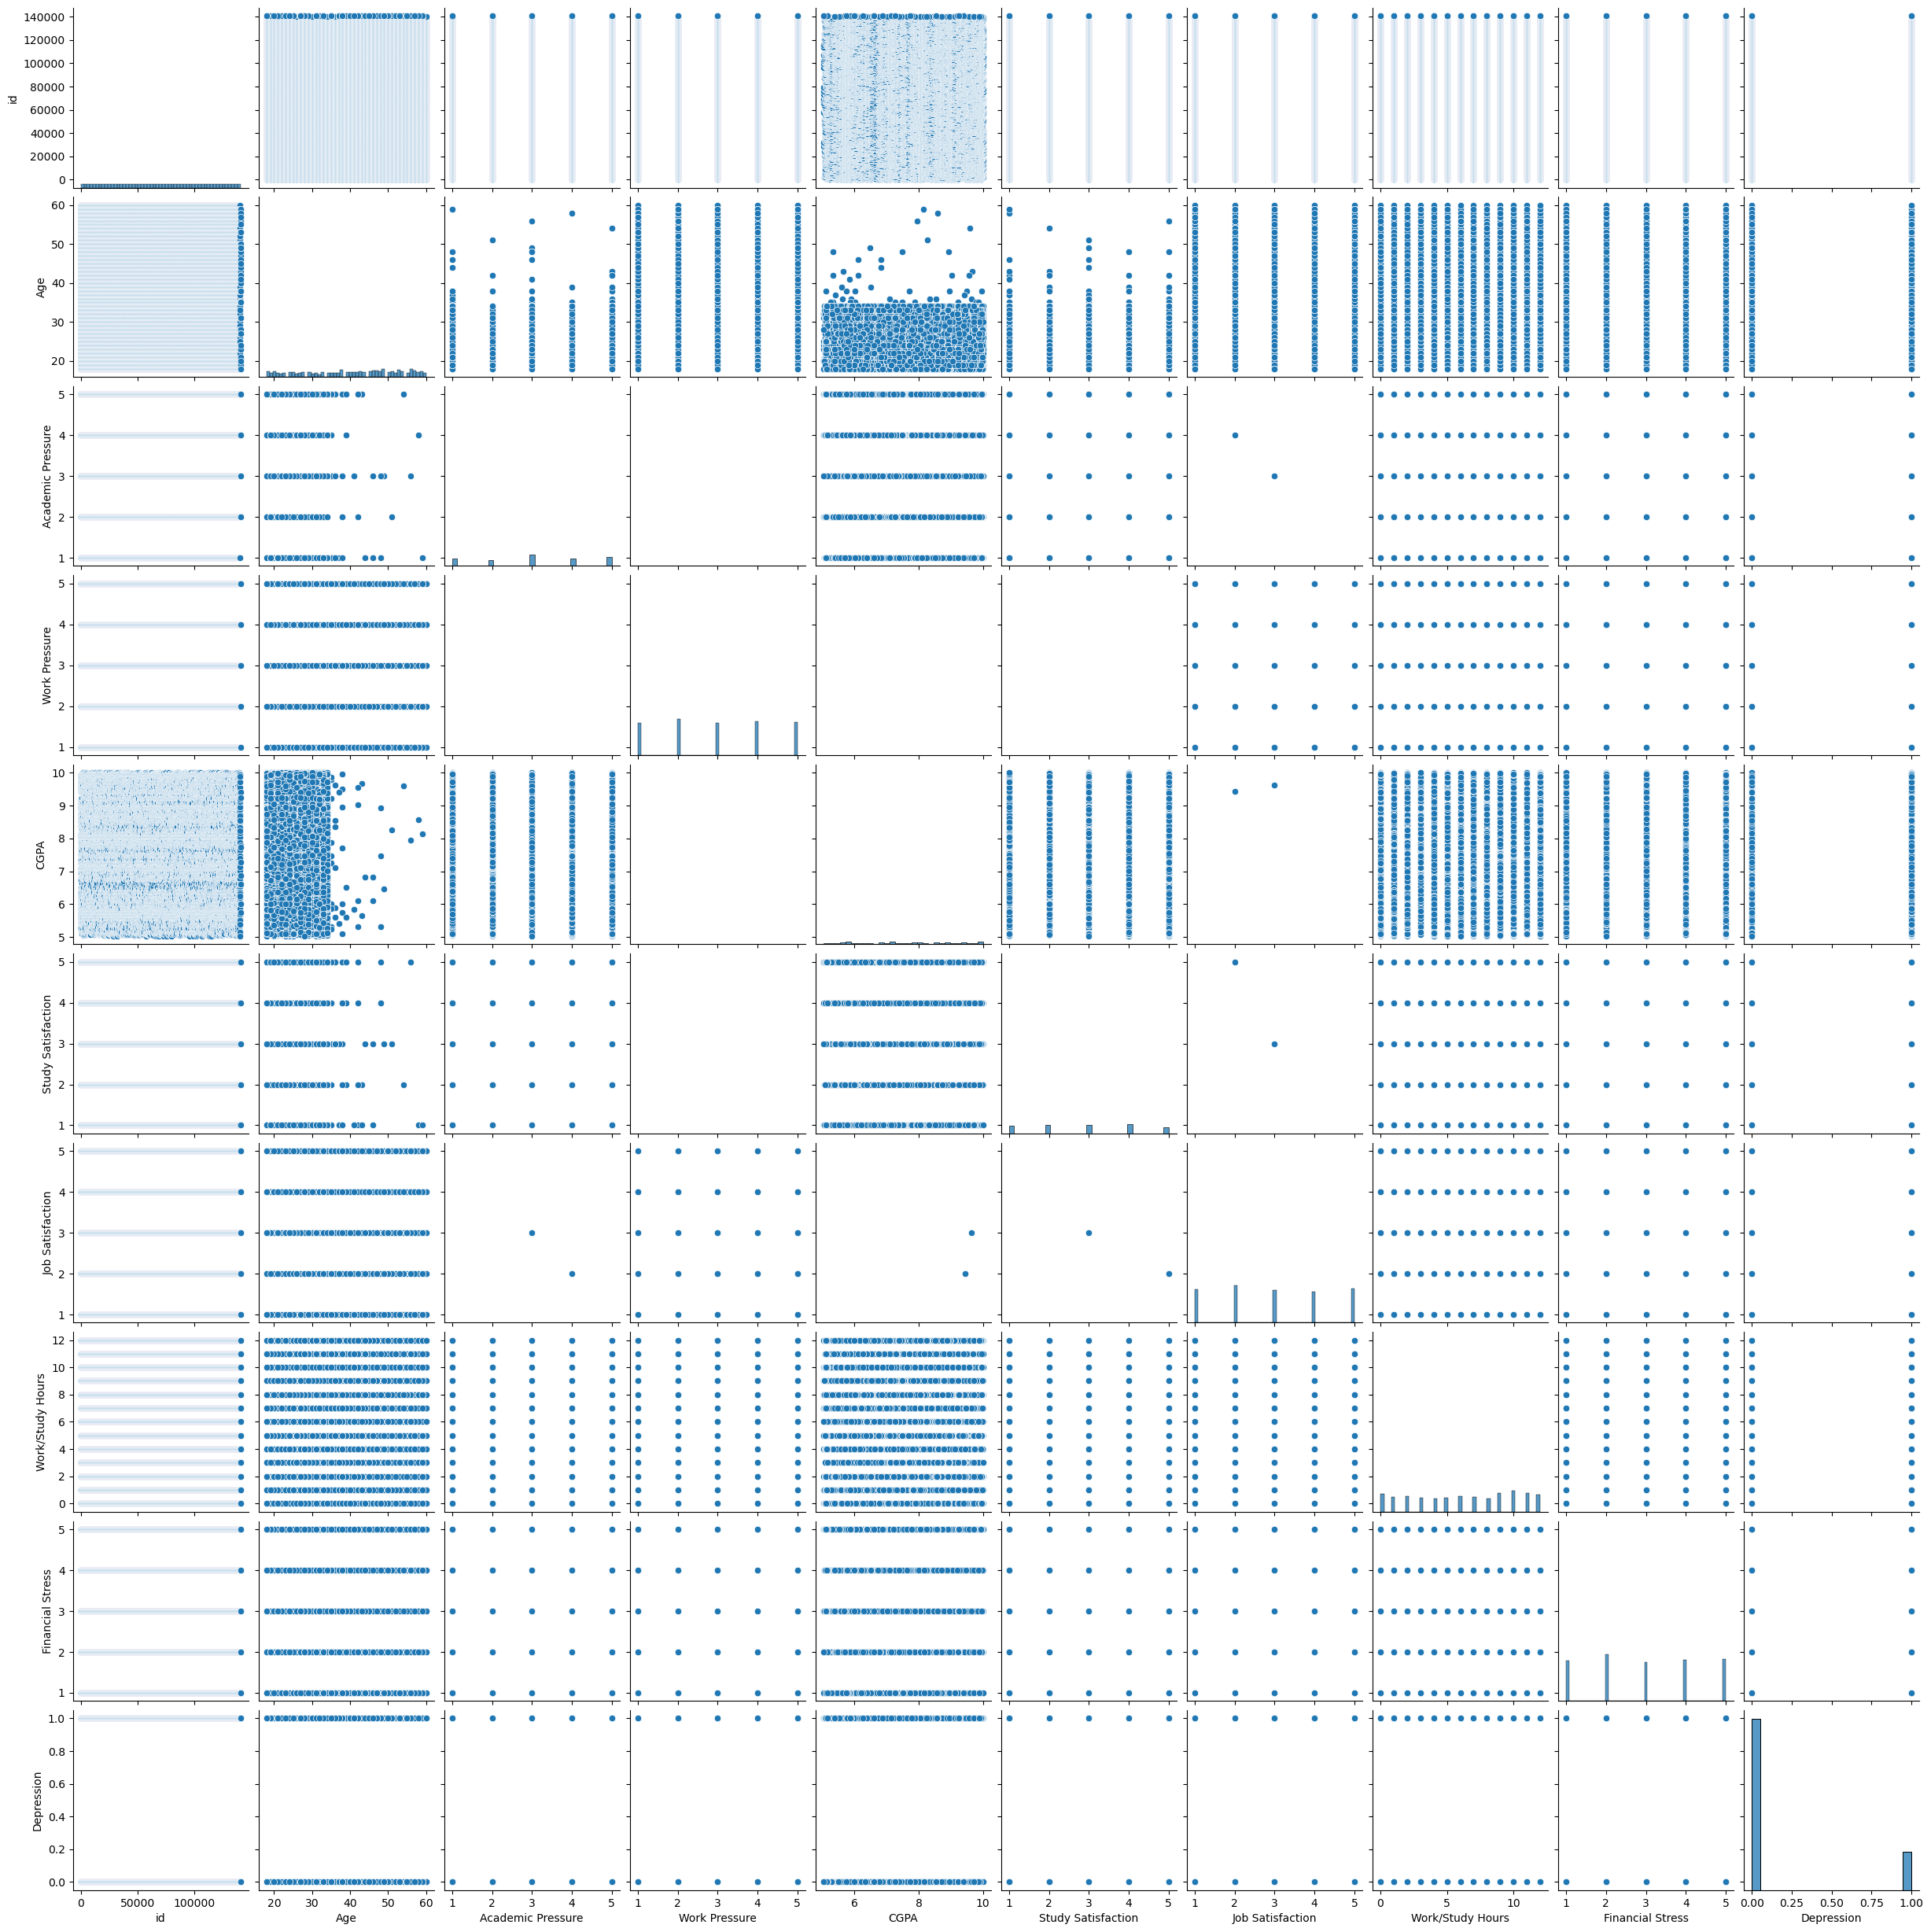

In [9]:
# Gráficos de dispersión entre pares de variables
sns.pairplot(df)
plt.show()

## 1.8 Análisis de Variables Categóricas

In [10]:

# Seleccionar solo columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category'])

for col in categorical_columns.columns:
    print(f"Valores únicos y frecuencias en la columna '{col}':")
    print(df[col].value_counts())
    print("\n")
    
# Gráfico de barras
#df['columna_categórica'].value_counts().plot(kind='bar')
#plt.show()

Valores únicos y frecuencias en la columna 'Name':
Name
Rohan       3178
Aarav       2336
Rupak       2176
Aaradhya    2045
Anvi        2035
            ... 
Anhil          1
Rieta          1
Zahra          1
Jathesh        1
Aarun          1
Name: count, Length: 422, dtype: int64


Valores únicos y frecuencias en la columna 'Gender':
Gender
Male      77464
Female    63236
Name: count, dtype: int64


Valores únicos y frecuencias en la columna 'City':
City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64


Valores únicos y frecuencias en la columna 'Working Professional or Student':
Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64


Valores únicos y frecuencias en la columna 'Profession':
Profession
Teacher     

# Preprocesamiento y transformacion 


from sklearn.base import TransformerMixin, BaseEstimator
import pandas as pd

class ImputacionValoresNulos(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # Calcular la media y el modo para cada columna
        self.mean_values = X.select_dtypes(include=['float64', 'int64']).mean()
        self.mode_values = X.select_dtypes(include=['object']).mode().iloc[0]
        return self

    def transform(self, X):
        X = X.copy()
        # Imputar valores nulos en columnas numéricas
        for col, value in self.mean_values.items():
            if col in X.columns:
                X[col] = X[col].fillna(value)
        # Imputar valores nulos en columnas categóricas
        for col, value in self.mode_values.items():
            if col in X.columns:
                X[col] = X[col].fillna(value)
        return X

#### Imputacion de valores nulos 

In [11]:
def imputar_valores_nulos(df):
    # Calcular la media y el modo para cada columna
    mean_values = df.select_dtypes(include=['float64', 'int64']).mean()
    mode_values = df.select_dtypes(include=['object']).mode().iloc[0]
    
    # Imputar valores nulos en columnas numéricas
    for col, value in mean_values.items():
        if col in df.columns:
            df[col] = df[col].fillna(value)
    
    # Imputar valores nulos en columnas categóricas
    for col, value in mode_values.items():
        if col in df.columns:
            df[col] = df[col].fillna(value)
    
    return df

df = imputar_valores_nulos(df)
df.head()

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure      CGPA  \
0              Chef           3.142273       5.000000  7.658636   
1           Teacher           3.142273       4.000000  7.658636   
2           Teacher           5.000000       2.998998  8.970000   
3           Teacher           3.142273       5.000000  7.658636   
4  Business Analyst           3.142273       1.000000  7.658636   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0             2.94494          2.000000  More than 8 hours        Healthy   
1             2.94494          3.000000  Less than 5 hours      Unhealthy   
2             2.00000          2.974404          5-6 hours        Healthy   
3             2.94494          1.000000  Less than 5 hours       Moderate   
4             2.94494          1.000000          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

#### Identificación de Outliers (Datos Atípicos)

In [ ]:
# Ejemplo de identificación e imputación de outliers
def identificar_imputar_outliers(df, metodo='IQR', factor=1.5):
    if metodo == 'IQR':
        for col in df.select_dtypes(include=['float64', 'int64']).columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_limit = Q1 - factor * IQR
            upper_limit = Q3 + factor * IQR
            
            # Imputar outliers con la mediana de la columna
            median_value = df[col].median()
            df[col] = np.where((df[col] < lower_limit) | (df[col] > upper_limit), median_value, df[col])
    
    return df


df = identificar_imputar_outliers(df)
df.head()

#### Tratamiento SleepDuration

In [12]:
# Ejemplo de mapeo de categorías de duración del sueño
def mapear_duracion_sueno(df):
    sleep_mapping = {
        'More than 8 hours': 'High Sleep', '7-8 hours': 'High Sleep', '6-7 hours': 'Moderate Sleep', 
        '6-8 hours': 'Moderate Sleep', '5-6 hours': 'Moderate Sleep', '4-6 hours': 'Low Sleep', 
        '4-5 hours': 'Low Sleep', '3-4 hours': 'Low Sleep', '2-3 hours': 'Very Low Sleep', 
        '1-2 hours': 'Very Low Sleep', 'Less than 5 hours': 'Very Low Sleep', '10-11 hours': 'High Sleep', 
        '9-11 hours': 'High Sleep', '8-9 hours': 'High Sleep', '1-6 hours': 'Low Sleep', '35-36 hours': 'Extremely High Sleep', 
        '40-45 hours': 'Extremely High Sleep', '45-48 hours': 'Extremely High Sleep', '49 hours': 'Extremely High Sleep', 
        '55-66 hours': 'Extremely High Sleep', 'Sleep_Duration': pd.NA, 'Work_Study_Hours': pd.NA, 'No': 'No Sleep', 
        'Unhealthy': 'Low Sleep', 'Pune': pd.NA, 'Indore': pd.NA, 'Moderate': 'Moderate Sleep', '9-5 hours': 'Moderate Sleep', 
        '9-5': 'Moderate Sleep', 'than 5 hours': 'Moderate Sleep', '10-6 hours': 'Moderate Sleep', '3-6 hours': 'Low Sleep', '45': pd.NA
    }
    df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)
    return df
   


In [13]:
 df = mapear_duracion_sueno(df)

In [14]:
    valores_unicos = df['Sleep Duration'].unique()
    print(f"Valores únicos en la columna '{'Sleep Duration'}': {valores_unicos}")

Valores únicos en la columna 'Sleep Duration': ['High Sleep' 'Very Low Sleep' 'Moderate Sleep' <NA> 'Low Sleep'
 'Extremely High Sleep' nan 'No Sleep']


#### Filtro para Dietary Habits

In [15]:
# Ejemplo de filtro de hábitos alimenticios válidos
def filtrar_habitos_alimenticios(df):
    valid_dietary_habits = ['Healthy', 'Unhealthy', 'Moderate', 'Indoor']
    # Asignar 'Unknown' a los hábitos alimenticios no válidos
    df['Dietary Habits'] = df['Dietary Habits'].apply(lambda x: x if x in valid_dietary_habits else 'Unknown')
    return df

In [16]:
df = filtrar_habitos_alimenticios(df)

In [17]:
    valores_unicos = df['Dietary Habits'].unique()
    print(f"Valores únicos en la columna '{'Dietary Habits'}': {valores_unicos}")

Valores únicos en la columna 'Dietary Habits': ['Healthy' 'Unhealthy' 'Moderate' 'Unknown' 'Indoor']


#### Conversion Binaria

In [18]:
# Ejemplo de conversión binaria de columnas
def conversion_binaria(df):
    df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
    df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
    df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})
    #df['Depression'] = df['Depression'].map({'No': 0, 'Yes': 1})
    return df


In [19]:
df = conversion_binaria(df)

In [20]:
df.head()

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya       0  49.0       Ludhiana            Working Professional   
1   1     Vivan       1  26.0       Varanasi            Working Professional   
2   2    Yuvraj       1  33.0  Visakhapatnam                         Student   
3   3    Yuvraj       1  22.0         Mumbai            Working Professional   
4   4      Rhea       0  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure      CGPA  \
0              Chef           3.142273       5.000000  7.658636   
1           Teacher           3.142273       4.000000  7.658636   
2           Teacher           5.000000       2.998998  8.970000   
3           Teacher           3.142273       5.000000  7.658636   
4  Business Analyst           3.142273       1.000000  7.658636   

   Study Satisfaction  Job Satisfaction  Sleep Duration Dietary Habits  \
0             2.94494          2.000000      High Sleep        Healthy   
1             2.94494          3.000000  Very Low Sleep      Unhealthy   
2             2.00000          2.974404  Moderate Sleep        Healthy   
3             2.94494          1.000000  Very Low Sleep       Moderate   
4             2.94494          1.000000  Moderate Sleep      Unhealthy   

    Degree  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                      0               1.0   
1      LLB                                      1               7.0   
2  B.Pharm                                      1               3.0   
3      BBA                                      1              10.0   
4      BBA                                      1               9.0   

   Financial Stress  Family History of Mental Illness  Depression  
0               2.0                                 0           0  
1               3.0                                 0           1  
2               1.0                                 0           1  
3               1.0                                 1           1  
4               4.0                                 1           0

In [28]:
from sklearn.preprocessing import OrdinalEncoder
# Ejemplo de codificación ordinal de duración del sueño y hábitos alimenticios
def codificar_ordinal_sueno_habitos(df):
    dietary_habits_order = ['Healthy', 'Moderate', 'Unhealthy', 'Indoor']
    sleep_duration_order = ['No Sleep', 'Very Low Sleep', 'Low Sleep', 'Moderate Sleep', 'High Sleep', 'Extremely High Sleep']
    ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[dietary_habits_order, sleep_duration_order])
    df[['Dietary Habits', 'Sleep Duration']] = ordinal_encoder.fit_transform(df[['Dietary Habits', 'Sleep Duration']])
    return df

In [29]:
df = codificar_ordinal_sueno_habitos(df)

In [30]:
df.head()

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya       0  49.0       Ludhiana            Working Professional   
1   1     Vivan       1  26.0       Varanasi            Working Professional   
2   2    Yuvraj       1  33.0  Visakhapatnam                         Student   
3   3    Yuvraj       1  22.0         Mumbai            Working Professional   
4   4      Rhea       0  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure      CGPA  \
0              Chef           3.142273       5.000000  7.658636   
1           Teacher           3.142273       4.000000  7.658636   
2           Teacher           5.000000       2.998998  8.970000   
3           Teacher           3.142273       5.000000  7.658636   
4  Business Analyst           3.142273       1.000000  7.658636   

   Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0             2.94494          2.000000             4.0             0.0   
1             2.94494          3.000000             1.0             2.0   
2             2.00000          2.974404             3.0             0.0   
3             2.94494          1.000000             1.0             1.0   
4             2.94494          1.000000             3.0             2.0   

    Degree  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                      0               1.0   
1      LLB                                      1               7.0   
2  B.Pharm                                      1               3.0   
3      BBA                                      1              10.0   
4      BBA                                      1               9.0   

   Financial Stress  Family History of Mental Illness  Depression  
0               2.0                                 0           0  
1               3.0                                 0           1  
2               1.0                                 0           1  
3               1.0                                 1           1  
4               4.0                                 1           0

In [31]:
# Eliminación de columnas innecesarias
def eliminar_columnas(df):
    df_seleccionado = df.drop(['id', 'Name', 'City', 'Working Professional or Student', 'Profession', 'Degree'], axis=1)
    return df_seleccionado.copy()


In [32]:
df_transformado = eliminar_columnas(df)

In [33]:
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  int64  
 1   Age                                    140700 non-null  float64
 2   Academic Pressure                      140700 non-null  float64
 3   Work Pressure                          140700 non-null  float64
 4   CGPA                                   140700 non-null  float64
 5   Study Satisfaction                     140700 non-null  float64
 6   Job Satisfaction                       140700 non-null  float64
 7   Sleep Duration                         140700 non-null  float64
 8   Dietary Habits                         140700 non-null  float64
 9   Have you ever had suicidal thoughts ?  140700 non-null  int64  
 10  Work/Study Hours                       140700 non-null  

In [34]:

# Crear un diccionario para almacenar los valores únicos de cada columna
valores_unicos = {col: df[col].unique() for col in df.columns}

# Mostrar los resultados
for columna, valores in valores_unicos.items():
    print(f"Valores únicos en '{columna}': {valores}")

Valores únicos en 'id': [     0      1      2 ... 140697 140698 140699]
Valores únicos en 'Name': ['Aaradhya' 'Vivan' 'Yuvraj' 'Rhea' 'Vani' 'Ritvik' 'Rajveer' 'Aishwarya'
 'Simran' 'Utkarsh' 'Aahana' 'Tejas' 'Aadhya' 'Kiran' 'Aditi' 'Suhani'
 'Jiya' 'Bhavesh' 'Armaan' 'Ishaani' 'Prachi' 'Pratyush' 'Abhinav'
 'Siddhesh' 'Aditya' 'Aarav' 'Asha' 'Kashish' 'Prisha' 'Chhavi' 'Tanmay'
 'Vihaan' 'Shiv' 'Anvi' 'Darsh' 'Samar' 'Raunak' 'Mahi' 'Shaurya' 'Vidya'
 'Jai' 'Ayush' 'Ansh' 'Anand' 'Yashvi' 'Shrey' 'Ritika' 'Mihir' 'Isha'
 'Arjun' 'Rohan' 'Pratham' 'Nirvaan' 'Ishaan' 'Aarya' 'Riya' 'Aariv'
 'Raghavendra' 'Mahika' 'Abhishek' 'Harshil' 'Janvi' 'Kartikeya' 'Shivam'
 'Advait' 'Reyansh' 'Saanvi' 'Ivaan' 'Pallavi' 'Sneha' 'Ayaan' 'Aakash'
 'Raghav' 'Satyam' 'Aarush' 'Vibha' 'Rupal' 'Sanya' 'Mira' 'Rashi' 'Shlok'
 'Harsha' 'Divya' 'Pranav' 'Hrithik' 'Tushar' 'Garima' 'Zoya' 'Kian'
 'Navya' 'Lakshay' 'Kriti' 'Palak' 'Aryan' 'Parth' 'Ishan' 'Rupak'
 'Atharv' 'Aarti' 'Anirudh' 'Kabir' 'Sanjeev' 

 # Modelamiento

En esta fase, experimentaremos con distintos algoritmos de machine learning, 
como redes neuronales, árboles de decisión o máquinas de vectores de soporte (SVM).

In [37]:
from sklearn.model_selection import train_test_split

X = df_transformado.drop(columns=['Depression'])
y = df_transformado['Depression']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=100)
}

best_model = None
best_accuracy = 0
model_results = {}

for name, model in models.items():
    
    print(f"\n💻 Training {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred)

    y_train_pred = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    print(f'{name} Training Accuracy: {accuracy_train:.4f}')
    print(f'{name} Validation Accuracy: {accuracy_val:.4f}')
    print(classification_report(y_val, y_pred))
    

    model_results[name] = {
        'model': model,
        'train_accuracy': accuracy_train,
        'val_accuracy': accuracy_val,
        'classification_report': classification_report(y_val, y_pred, output_dict=True)
    }
    
   
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_model = model
        
# Visualizamos el mejor modelo
print(f'\n🏆 Mejor Modelo: {best_model.__class__.__name__} with validation accuracy: {best_accuracy:.4f}')


💻 Training Random Forest...
Random Forest Training Accuracy: 0.9997
Random Forest Validation Accuracy: 0.9344
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22986
           1       0.84      0.80      0.82      5154

    accuracy                           0.93     28140
   macro avg       0.90      0.88      0.89     28140
weighted avg       0.93      0.93      0.93     28140


💻 Training XGBoost...
XGBoost Training Accuracy: 0.9495
XGBoost Validation Accuracy: 0.9364
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22986
           1       0.84      0.81      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.89     28140
weighted avg       0.94      0.94      0.94     28140


💻 Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 

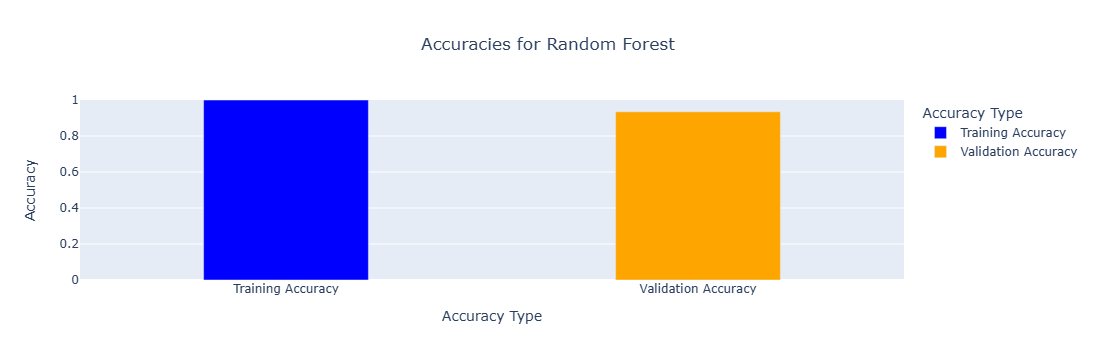

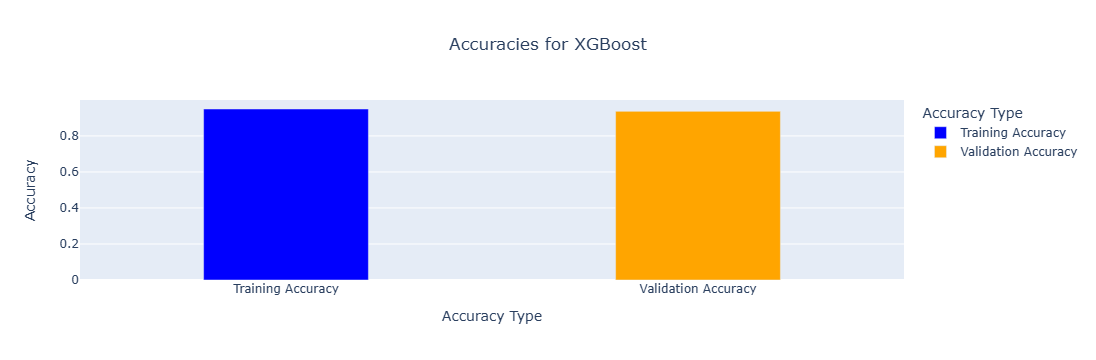

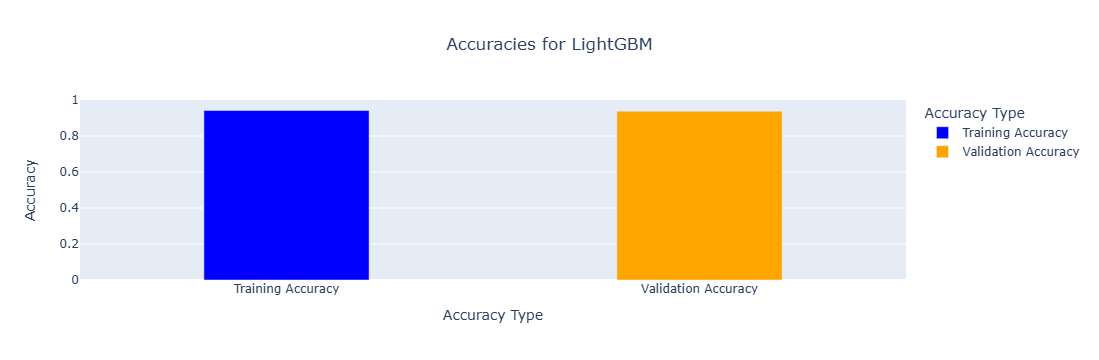

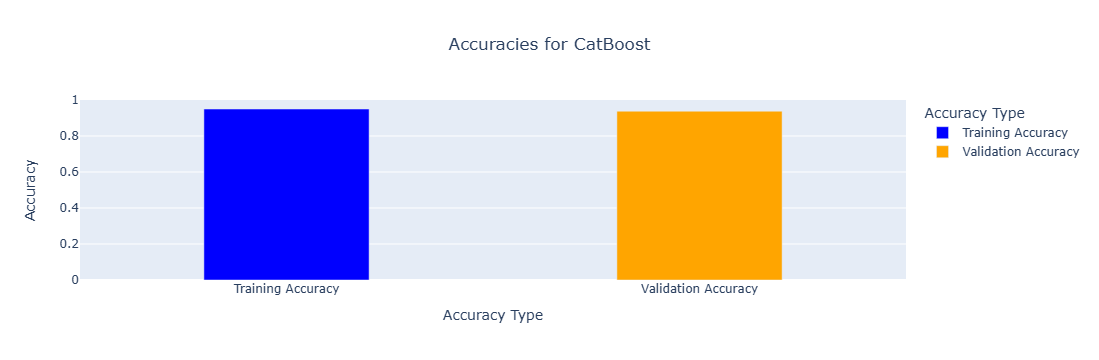

In [44]:
import plotly.express as px
import pandas as pd

# Crear DataFrame con resultados
results_df = pd.DataFrame({
    "Model": list(model_results.keys()),
    "Training Accuracy": [result['train_accuracy'] for result in model_results.values()],
    "Validation Accuracy": [result['val_accuracy'] for result in model_results.values()]
})

# Generar gráficos individuales para cada modelo
for index, row in results_df.iterrows():
    model_name = row["Model"]
    data = pd.DataFrame({
        "Accuracy Type": ["Training Accuracy", "Validation Accuracy"],
        "Value": [row["Training Accuracy"], row["Validation Accuracy"]]
    })
    
    # Generar gráfico
    fig = px.bar(
        data,
        x="Accuracy Type",
        y="Value",
        color="Accuracy Type",
        title=f"Accuracies for {model_name}",
        color_discrete_map={"Training Accuracy": "blue", "Validation Accuracy": "orange"}  # Colores alineados
    )
    
    # Ajustar diseño para barras más delgadas y alineadas
    fig.update_traces(width=0.4)  # Ajustar el ancho de las barras
    fig.update_layout(
        xaxis=dict(title="Accuracy Type", tickmode="linear", tickangle=0),
        yaxis=dict(title="Accuracy", range=[0, 1]),
        bargap=0.2,  # Espacio entre las barras
        title=dict(x=0.5)  # Centrar el título
    )
    
    # Mostrar gráfico
    fig.show()

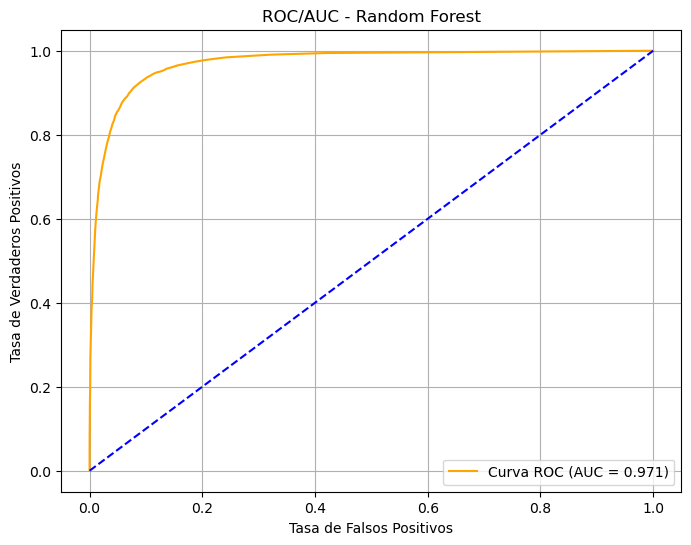

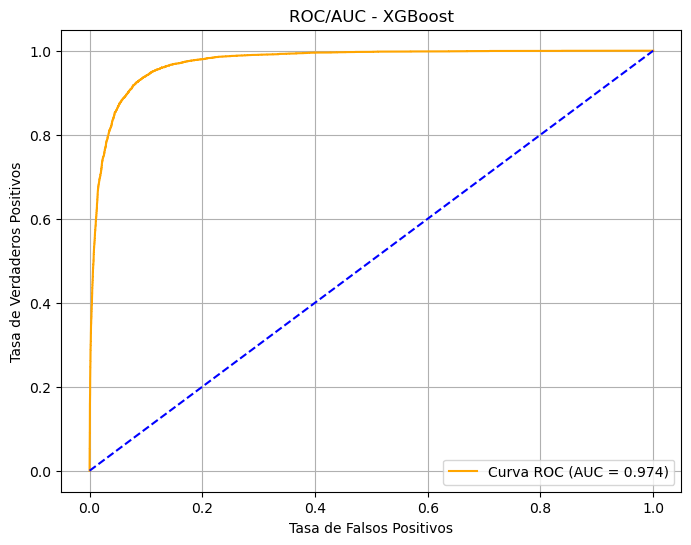

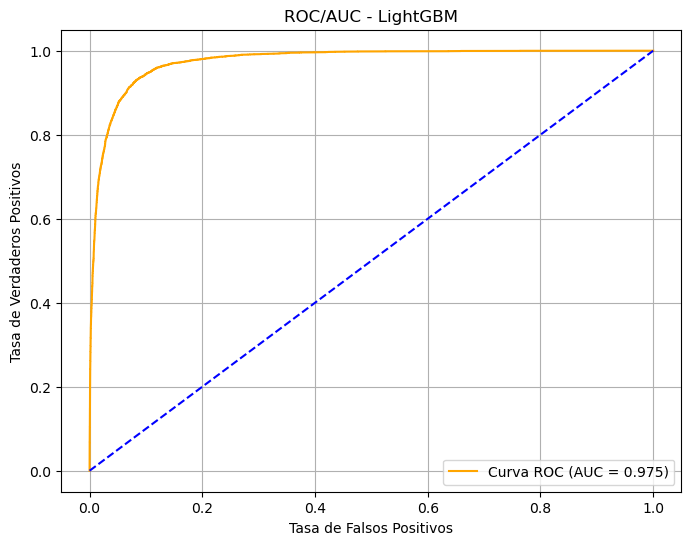

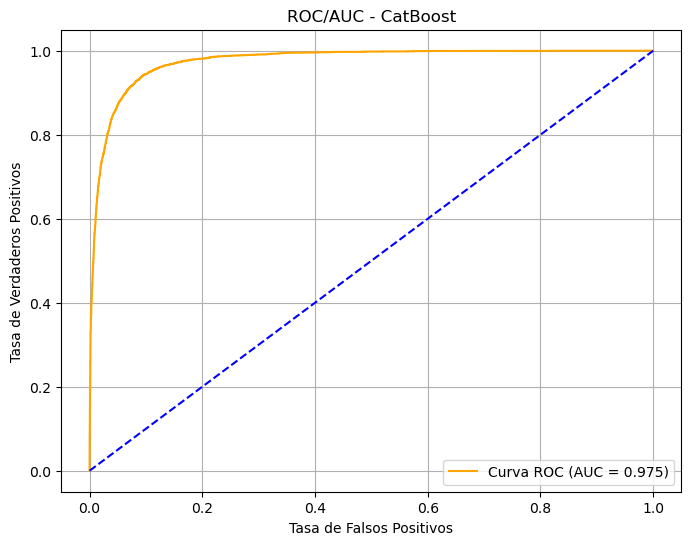

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generar Curva ROC para cada modelo
def plot_roc_curve(model, X_val, y_val, model_name):
    # Obtener predicciones de probabilidad
    y_pred_prob = model.predict_proba(X_val)[:, 1]

    # Calcular la Curva ROC y el AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Crear la gráfica
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', label=f'Curva ROC (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Línea diagonal
    plt.title(f'ROC/AUC - {model_name}')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Llamar a la función para cada modelo
for model_name, result in model_results.items():
    model = result['model']
    plot_roc_curve(model, X_val, y_val, model_name)

## Importancia de Caracteristicas 

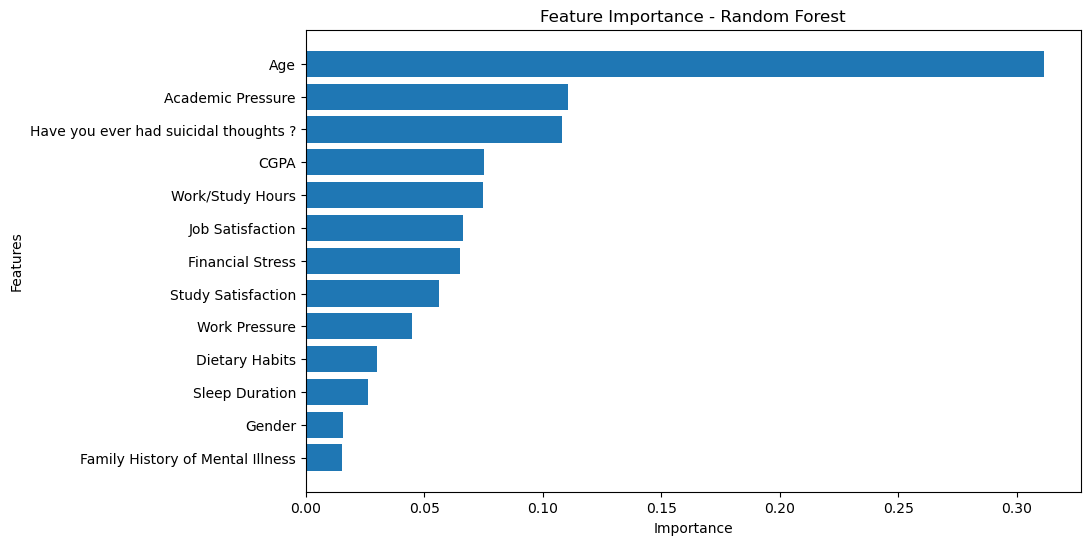

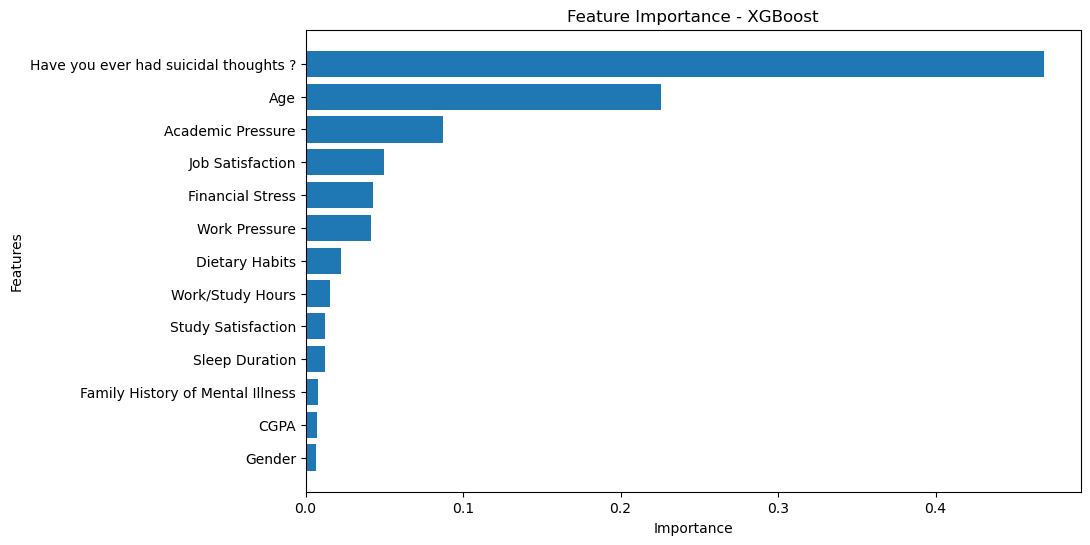

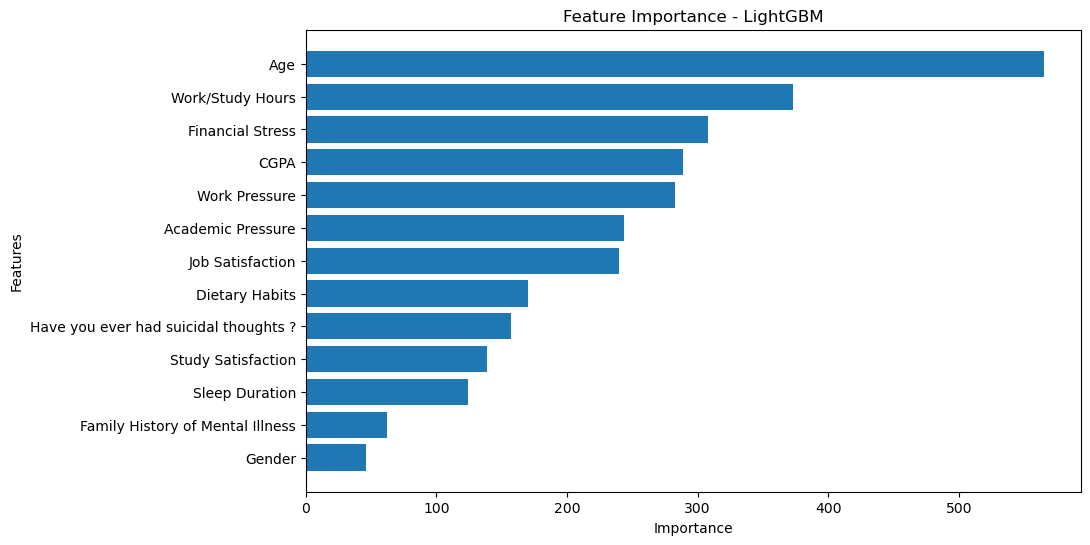

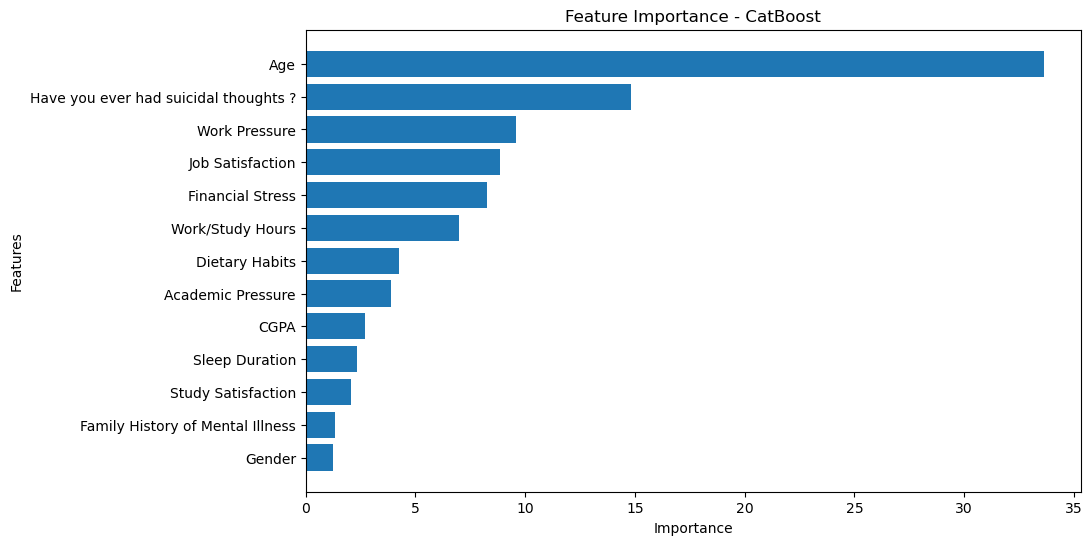

In [39]:
# Importancias de características
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance(model, feature_names, model_name):
    try:
        # Extraer importancia de características del modelo
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):  # Para modelos lineales, aunque no se usan aquí
            importances = model.coef_[0]
        else:
            print(f"⚠️ {model_name} no proporciona importancias de características.")
            return

        # Crear DataFrame para ordenarlas
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        # Visualizar
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.gca().invert_yaxis()
        plt.title(f'Feature Importance - {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.show()
    except Exception as e:
        print(f"Error al calcular las importancias de {model_name}: {e}")

# Obtener nombres de las características
feature_names = X.columns

# Generar gráficos para cada modelo con importancia de características
for name, result in model_results.items():
    plot_feature_importance(result['model'], feature_names, name)

## Comparacion de modelos 

Model Comparison Results
           Model  Train Accuracy  Validation Accuracy  Precision    Recall  \
0  Random Forest        0.999654             0.934364   0.933308  0.934364   
1        XGBoost        0.949485             0.936354   0.935715  0.936354   
2       LightGBM        0.942360             0.938060   0.937418  0.938060   
3       CatBoost        0.949805             0.937704   0.936873  0.937704   

   F1-Score  
0  0.933718  
1  0.935995  
2  0.937696  
3  0.937211  


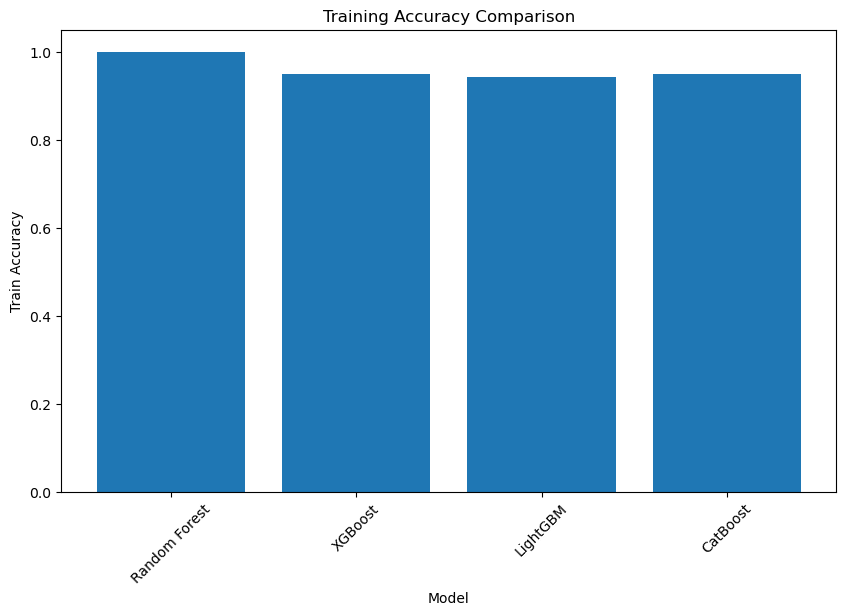

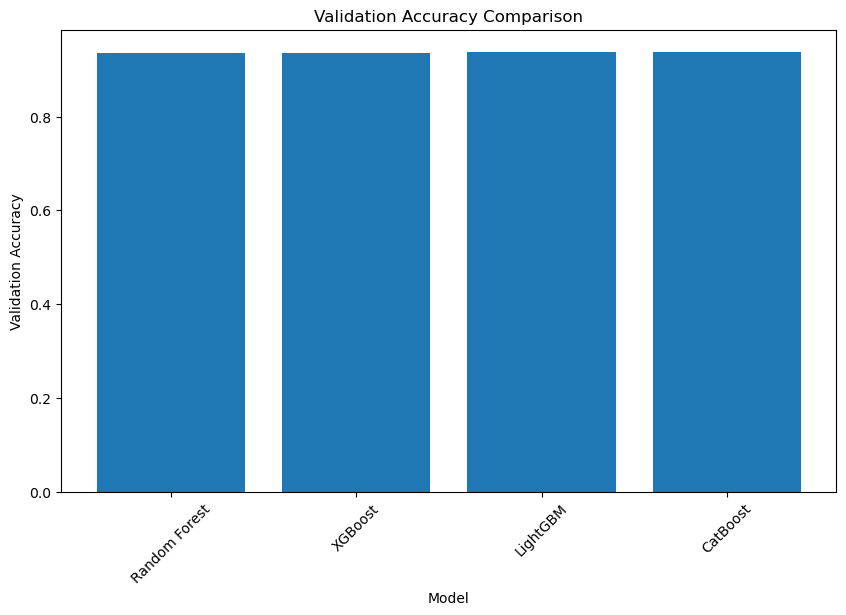

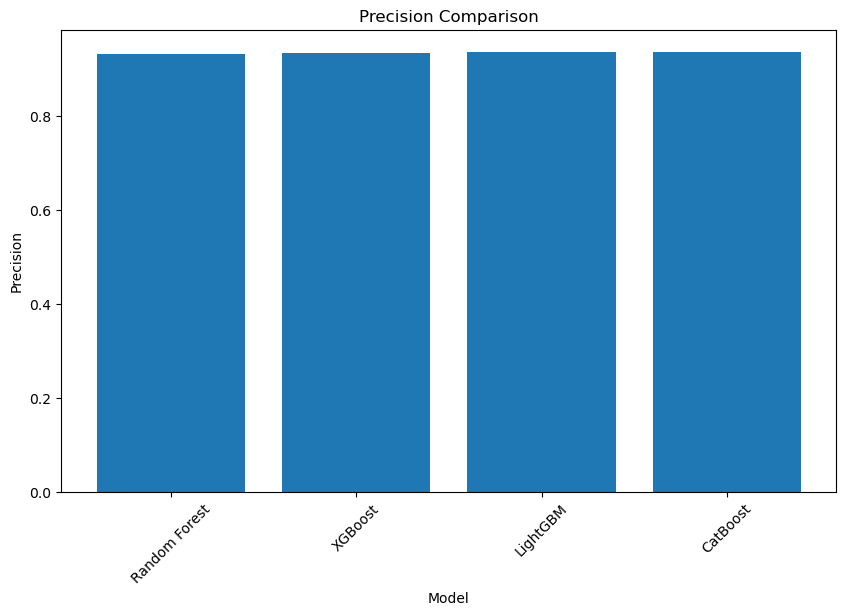

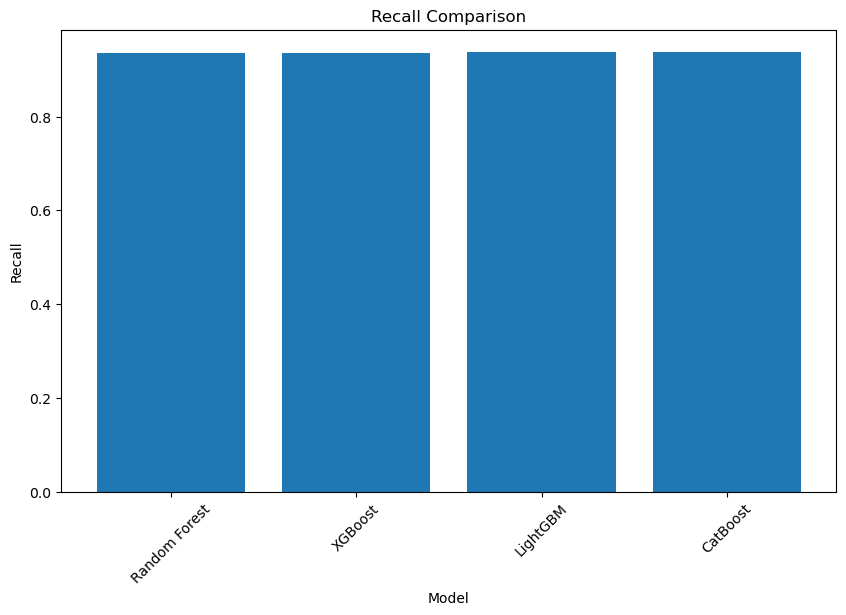

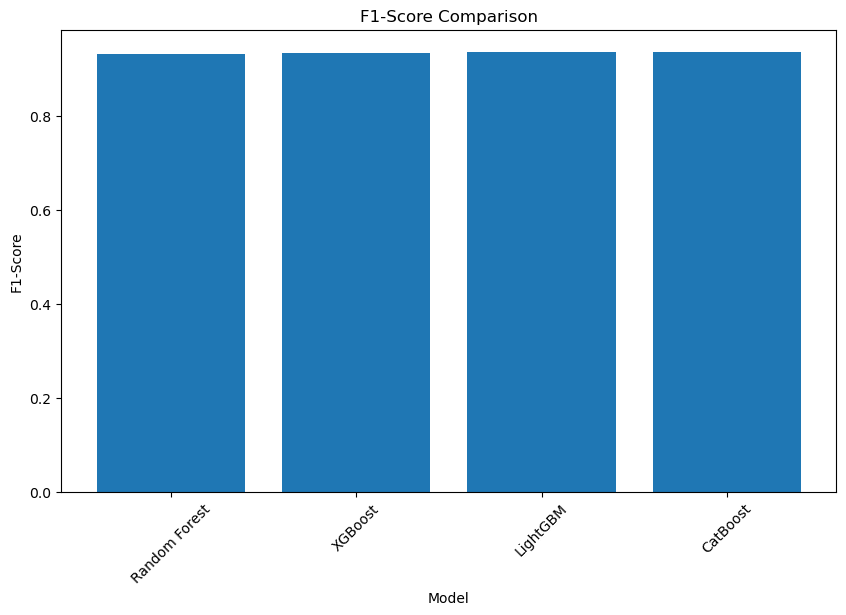

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con los resultados de los modelos
comparison_data = []
for name, result in model_results.items():
    val_report = result['classification_report']['weighted avg']
    comparison_data.append({
        'Model': name,
        'Train Accuracy': result['train_accuracy'],
        'Validation Accuracy': result['val_accuracy'],
        'Precision': val_report['precision'],
        'Recall': val_report['recall'],
        'F1-Score': val_report['f1-score']
    })

comparison_df = pd.DataFrame(comparison_data)

# Mostrar la tabla en consola
print("Model Comparison Results")
print(comparison_df)

# Visualizar los resultados
def plot_comparison(df, metric, title):
    plt.figure(figsize=(10, 6))
    plt.bar(df['Model'], df[metric])
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()

# Gráficos para cada métrica
plot_comparison(comparison_df, 'Train Accuracy', 'Training Accuracy Comparison')
plot_comparison(comparison_df, 'Validation Accuracy', 'Validation Accuracy Comparison')
plot_comparison(comparison_df, 'Precision', 'Precision Comparison')
plot_comparison(comparison_df, 'Recall', 'Recall Comparison')
plot_comparison(comparison_df, 'F1-Score', 'F1-Score Comparison')

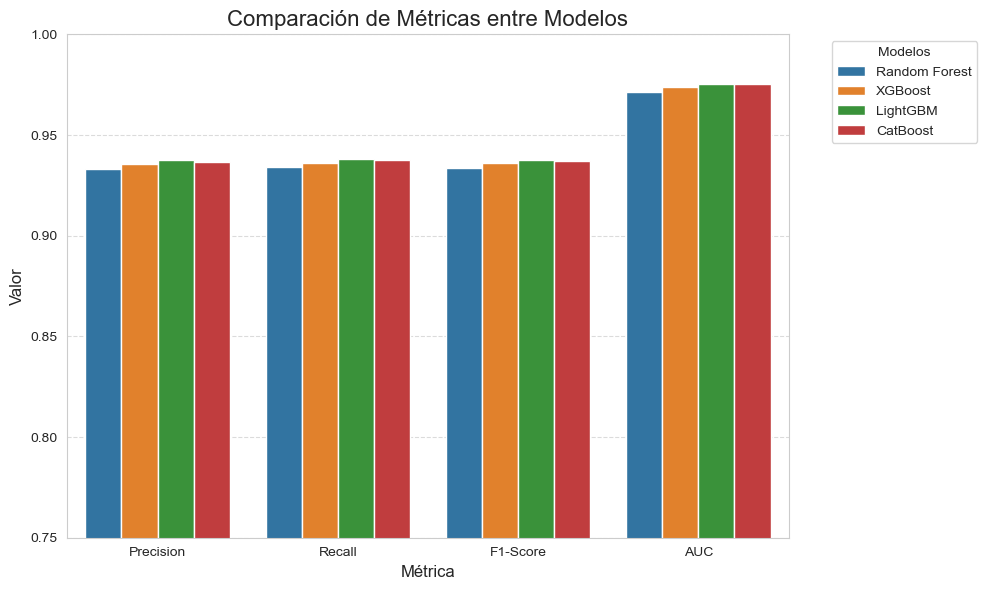

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar los datos para Seaborn
metrics_melted = metrics_df.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Value')

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Metric', y='Value', hue='Model', palette="tab10")

# Configurar la gráfica
plt.title('Comparación de Métricas entre Modelos', fontsize=16)
plt.ylabel('Valor', fontsize=12)
plt.xlabel('Métrica', fontsize=12)
plt.ylim(0.75, 1.0)  # Ajustar el rango del eje Y
plt.legend(title='Modelos', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

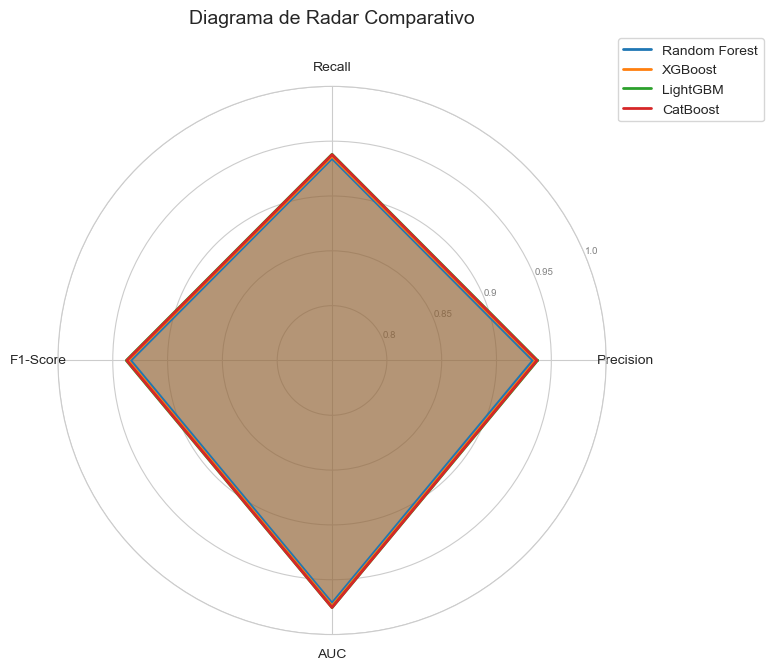

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear el DataFrame con las métricas de cada modelo
comparison_data = []
for name, result in model_results.items():
    val_report = result['classification_report']['weighted avg']
    comparison_data.append({
        'Model': name,
        'Precision': val_report['precision'],
        'Recall': val_report['recall'],
        'F1-Score': val_report['f1-score'],
        'AUC': None  # Placeholder para agregar AUC más adelante
    })

# Calcular el AUC para cada modelo
from sklearn.metrics import roc_auc_score

for idx, (name, result) in enumerate(model_results.items()):
    model = result['model']
    y_pred_prob = model.predict_proba(X_val)[:, 1]
    auc_score = roc_auc_score(y_val, y_pred_prob)
    comparison_data[idx]['AUC'] = auc_score

# Convertir a DataFrame
metrics_df = pd.DataFrame(comparison_data)
metrics_df.set_index('Model', inplace=True)

# Preparar datos para el radar
categories = list(metrics_df.columns)
num_vars = len(categories)

# Crear el diagrama de radar
plt.figure(figsize=(8, 8))
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

for idx, model in enumerate(metrics_df.index):
    values = metrics_df.loc[model].tolist()
    values += values[:1]  # Cerrar el gráfico
    plt.polar(angles, values, label=model, linewidth=2)
    plt.fill(angles, values, alpha=0.25)

plt.xticks(angles[:-1], categories, fontsize=10)
plt.yticks([0.8, 0.85, 0.9, 0.95, 1.0], ["0.8", "0.85", "0.9", "0.95", "1.0"], color="grey", size=7)
plt.ylim(0.75, 1.0)
plt.title("Diagrama de Radar Comparativo", size=14, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

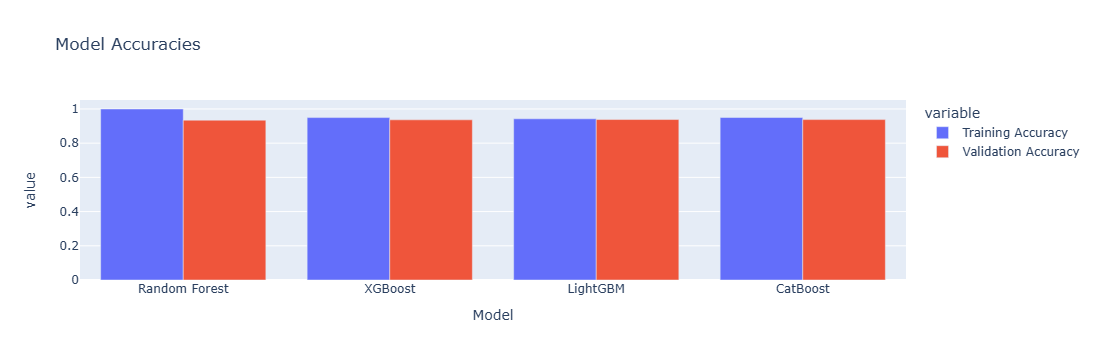

In [40]:
import plotly.express as px
results_df = pd.DataFrame({
    "Model": list(model_results.keys()),
    "Training Accuracy": [result['train_accuracy'] for result in model_results.values()],
    "Validation Accuracy": [result['val_accuracy'] for result in model_results.values()]
})
fig = px.bar(results_df, x="Model", y=["Training Accuracy", "Validation Accuracy"], barmode="group", title="Model Accuracies")
fig.show()


📊 Cross-Validation Results:

💻 Running Cross-Validation for Random Forest...
Random Forest - Mean Accuracy: 0.9353, Standard Deviation: 0.0011

💻 Running Cross-Validation for XGBoost...
XGBoost - Mean Accuracy: 0.9371, Standard Deviation: 0.0009

💻 Running Cross-Validation for LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20454, number of negative: 92106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181716 -> initscore=-1.504762
[LightGBM] [Info] Start training from score -1.504762
[LightGBM] [Warning] Found whitespace in feature_names, replace with un

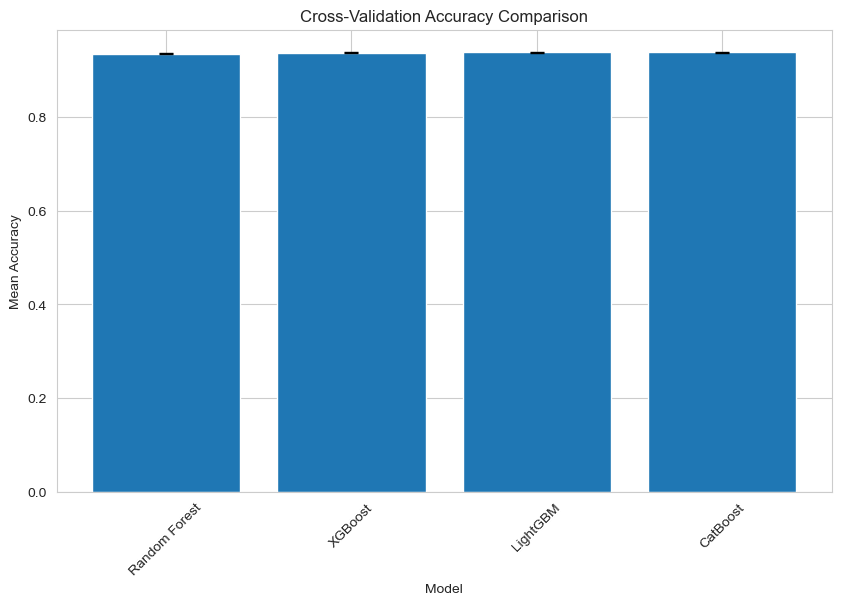

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Definir el número de pliegues
n_splits = 5  # Cambia este valor según sea necesario

# Métrica de evaluación
scoring = 'accuracy'  # Cambia a otras métricas como 'f1', 'precision', etc., si es necesario

# Resultados de Cross-Validation
cv_results = {}

print("\n📊 Cross-Validation Results:")
for name, model in models.items():
    print(f"\n💻 Running Cross-Validation for {name}...")
    
    # Calcular scores de CV
    scores = cross_val_score(model, X, y, cv=n_splits, scoring=scoring)
    mean_score = scores.mean()
    std_score = scores.std()

    # Guardar resultados
    cv_results[name] = {
        'Mean Accuracy': mean_score,
        'Standard Deviation': std_score
    }
    
    # Mostrar resultados
    print(f'{name} - Mean Accuracy: {mean_score:.4f}, Standard Deviation: {std_score:.4f}')

# Crear un DataFrame con los resultados de CV
cv_df = pd.DataFrame(cv_results).T
cv_df.reset_index(inplace=True)
cv_df.rename(columns={'index': 'Model'}, inplace=True)

# Mostrar tabla de resultados
print("\nCross-Validation Summary:")
print(cv_df)

# Graficar los resultados de CV
plt.figure(figsize=(10, 6))
plt.bar(cv_df['Model'], cv_df['Mean Accuracy'], yerr=cv_df['Standard Deviation'], capsize=5)
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Mean Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

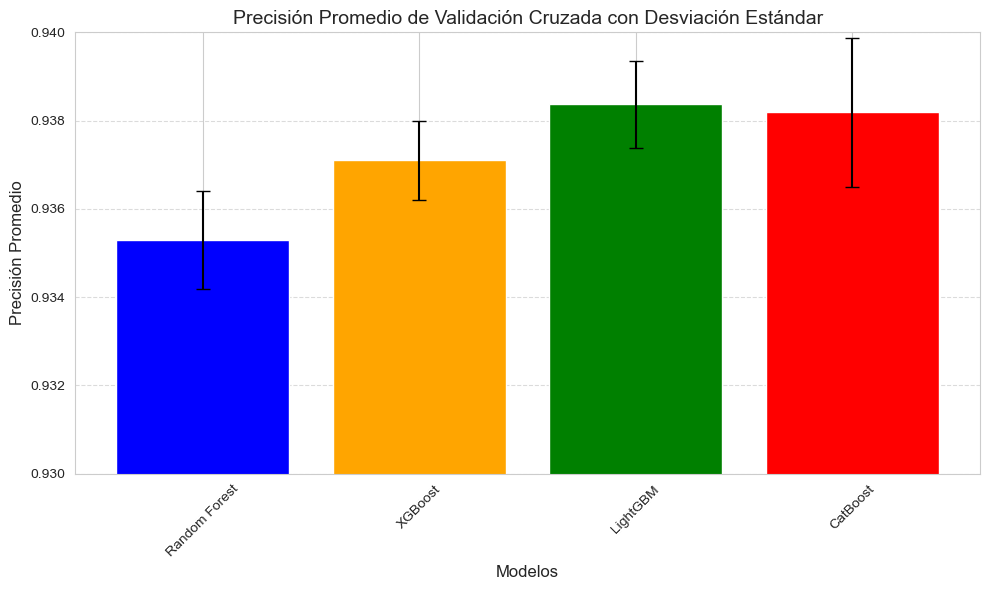

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de precisión promedio y desviación estándar
models = cv_df['Model']
mean_accuracy = cv_df['Mean Accuracy']
std_dev = cv_df['Standard Deviation']

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(models, mean_accuracy, yerr=std_dev, capsize=5, color=['blue', 'orange', 'green', 'red'])
plt.title('Precisión Promedio de Validación Cruzada con Desviación Estándar', fontsize=14)
plt.ylabel('Precisión Promedio', fontsize=12)
plt.xlabel('Modelos', fontsize=12)
plt.ylim(0.93, 0.94)  # Ajustar rango si es necesario
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()

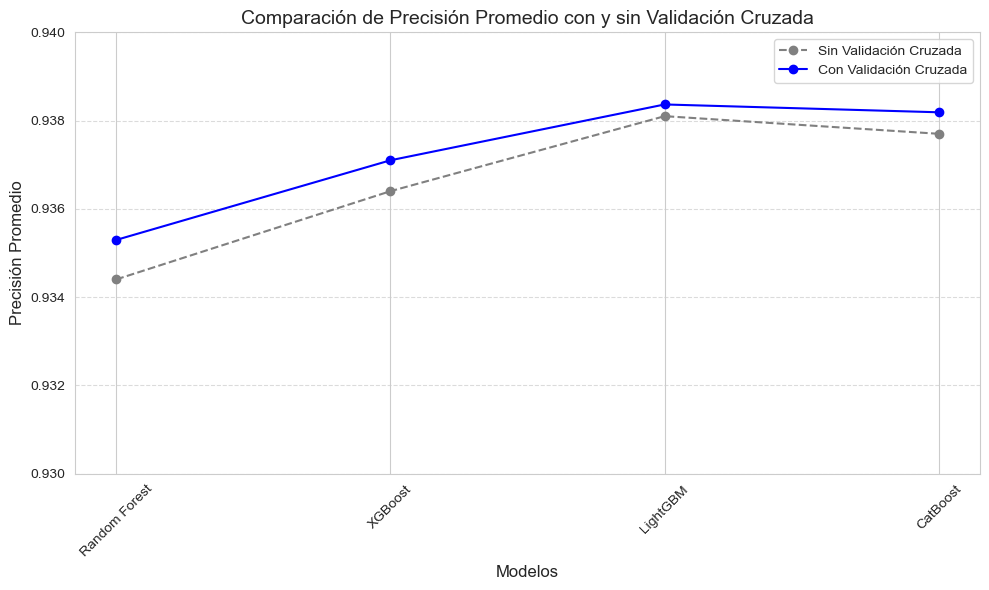

In [54]:
# Datos de comparación (precisiones obtenidas previamente sin CV)
accuracy_without_cv = {
    'Random Forest': 0.9344,
    'XGBoost': 0.9364,
    'LightGBM': 0.9381,
    'CatBoost': 0.9377
}

# Precisión promedio con CV
accuracy_with_cv = dict(zip(cv_df['Model'], cv_df['Mean Accuracy']))

# Preparar datos
models = list(accuracy_without_cv.keys())
accuracy_without = [accuracy_without_cv[model] for model in models]
accuracy_with = [accuracy_with_cv[model] for model in models]

# Gráfico comparativo
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
plt.plot(x, accuracy_without, marker='o', label='Sin Validación Cruzada', linestyle='--', color='gray')
plt.plot(x, accuracy_with, marker='o', label='Con Validación Cruzada', linestyle='-', color='blue')
plt.title('Comparación de Precisión Promedio con y sin Validación Cruzada', fontsize=14)
plt.ylabel('Precisión Promedio', fontsize=12)
plt.xlabel('Modelos', fontsize=12)
plt.xticks(x, models, rotation=45)
plt.ylim(0.93, 0.94)  # Ajustar rango si es necesario
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()